In [1]:
#Imports 
from music21 import *

In [2]:
i = interval.Interval('m3')

In [3]:
print(i.semiSimpleName)
print(i.niceName) 
print(i.semitones)

m3
Minor Third
3


In [4]:
list_of_intervals=['m3', 'p4', 'p5', 'm7']
print("The Minor Pentatonic Scale consists of the following intervals:")
for interval_symbol in list_of_intervals:
    i=interval.Interval(interval_symbol)
    print("The interval symbol %s, has a name %s and consists of %s semitones." % (i.semiSimpleName, i.niceName,  i.semitones))
   

The Minor Pentatonic Scale consists of the following intervals:
The interval symbol m3, has a name Minor Third and consists of 3 semitones.
The interval symbol P4, has a name Perfect Fourth and consists of 5 semitones.
The interval symbol P5, has a name Perfect Fifth and consists of 7 semitones.
The interval symbol m7, has a name Minor Seventh and consists of 10 semitones.


In [5]:
string=6
fret=5
fret_note = tablature.FretNote(string, fret)
guitar_note = tablature.GuitarFretBoard([fret_note])
note_name=guitar_note.getPitches()[6-string]

In [41]:
print(note_name)

A2


In [42]:
i = interval.Interval('p4')
interval_pitch = i.transposePitch(note_name)
print("The interval %s of %s is %s." % (i.niceName, note_name, interval_pitch.nameWithOctave))

The interval Perfect Fourth of A2 is D3.


In [43]:

print("Pitch: %s " % interval_pitch.nameWithOctave)
print("Frequency: %s Hz." % interval_pitch.frequency)
print("Midi Number: %s." % interval_pitch.midi)


Note: A2
Interva: 
Pitch: D3 
Frequency: 146.83238395870364 Hz.
Midi Number: 50.


In [10]:
def minor_pentatonic(pitch_name):
    list_of_intervals=['p1','m3', 'p4', 'p5', 'm7']
    
    return [interval.Interval(interval_symbol).transposeNote(note.Note(pitch_name)) 
           for interval_symbol in list_of_intervals]
    
        

In [11]:
Gsharp_minor_pentatonic = minor_pentatonic('G#4')

In [12]:
s1 = stream.Stream()
s1.append(Gsharp_minor_pentatonic)

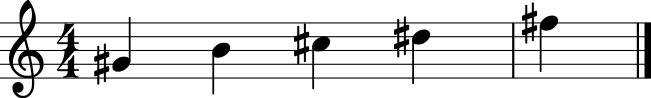

In [13]:
s1.show()

In [14]:
s1.show('midi')

In [30]:
def fret_to_notePitch(string, fret):
    fret_note = tablature.FretNote(string, fret)
    guitar_note = tablature.GuitarFretBoard([fret_note])
    return note.Note(guitar_note.getPitches()[6-string])

In [31]:
fret_to_notePitch(6,5)

<music21.note.Note A>

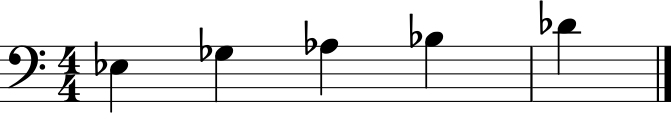

In [39]:
s2=stream.Stream()
Dsharp_minor_pentatonic=minor_pentatonic(fret_to_notePitch(5,6).nameWithOctave)
s2.append(Dsharp_minor_pentatonic)
s2.show()

In [40]:
s2.show('midi')

In [44]:
import platform

In [45]:

print(platform.python_version())

3.5.4
